<a href="https://colab.research.google.com/github/leonardo99i/Inteligencia_Artificial/blob/main/Projeto_FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

projeto fuzzy


In [ ]:
#Passo 1 - Definição do Problema.
'''
* Tempo em que um carro atinge 100 Km/h dependendo da capacidade do motor
* Utilizando o Modelo Honda Civic, modelo New Civic 2000-2011 motores 1.6, 1.8 e 2.0
* 1.6 -> 12
* 1.8 -> 10s
* 2.0 -> 9s
* => Velocidade, Potencia do Motor, Tempo, Modelo do Carro
'''

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d861fd77a470e49a39b4fd5c820bd0b20517d52fecf2d903d60553a7b3e6f28d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

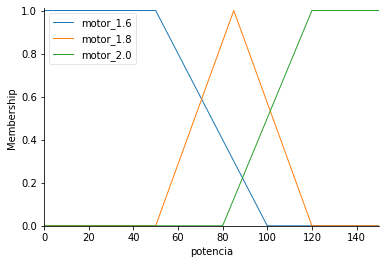

In [ ]:
if __name__=="__main__":

  #variáveis de entrada:
  velocidade = ctrl.Antecedent(np.arange(0, 101, 1), 'velocidade')
  potencia = ctrl.Antecedent(np.arange(0, 151, 1), 'potencia')

  #variável de saída:
  tempo = ctrl.Consequent(np.arange(0, 13, 1), 'risco')

  #fuzzificação:
  velocidade['minima'] = fuzz.trimf(velocidade.universe, [0, 25, 50])
  velocidade['medio'] = fuzz.trimf(velocidade.universe, [25, 50, 75])
  velocidade['maxima'] = fuzz.trimf(velocidade.universe, [50, 75, 100])

  potencia['motor_1.6'] = fuzz.trapmf(potencia.universe, [0, 0, 50, 100])
  potencia['motor_1.8'] = fuzz.trimf(potencia.universe, [50, 85, 120])
  potencia['motor_2.0'] = fuzz.trapmf(potencia.universe, [80, 120, 150, 150])
  
  #definindo as regras
  regra1 =ctrl.Rule(potencia['1.6'] | velocidade[])
  regra2 = 
  regra3 =




  #ativação de regras
  tempo_de_chegada = ctrl.ControlSystem([regra1, regra2, regra3])
  potencia_motor = ctrl.ControlSystemSimulation(tempo_de_chegada)
  

  potencia.view()
